**Name: A Rahul**  
**Reg No: 20BRS1102**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 01 - 08 12 22/Class work

/content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 01 - 08 12 22/Class work


# **Class Sample Problem (MNIST Dataset)**

### Import the dataset and explore the data

In [3]:
import tensorflow as tf
from keras.datasets import mnist

In [4]:
tf.__version__

'2.9.2'

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
len(y_train)

60000

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
import numpy as np
np.max(X_train)

255

In [11]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### Build a deep learning model

The last layer has 10 neurons as there are 10 digits in total (0-9).

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])


In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
model.compile(optimizer = "adam",
              loss = loss_fn,
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3043 - accuracy: 0.9108
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1520 - accuracy: 0.9547
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1163 - accuracy: 0.9643
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0985 - accuracy: 0.9696
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0855 - accuracy: 0.9733


In [16]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0735 - accuracy: 0.9769 - 716ms/epoch - 2ms/step


[0.07350051403045654, 0.9768999814987183]

# **Fashion MNIST Dataset**

In [17]:
from tensorflow.keras.datasets import fashion_mnist

In [18]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train_new = []
y_train_new = []

for i in range(len(y_train)):
  if y_train[i] not in [6,7,8,9]:
    X_train_new.append(X_train[i])
    y_train_new.append(y_train[i])

X_test_new = []
y_test_new = []

for i in range(len(y_test)):
  if y_test[i] not in [6,7,8,9]:
    X_test_new.append(X_test[i])
    y_test_new.append(y_test[i])

import numpy as np
X_train_new = np.array(X_train_new)/255
y_train_new = tf.keras.utils.to_categorical(np.array(y_train_new))
X_test_new = np.array(X_test_new)/255
y_test_new = tf.keras.utils.to_categorical(np.array(y_test_new))

In [22]:
print(X_train_new.shape)
print(y_train_new.shape)

(36000, 28, 28)
(36000, 6)


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation = "sigmoid")
])

'''tf.keras.layers.Dense(X_train_new.shape[1]*X_train_new.shape[2], 
                          activation="relu",
                          input_shape=(28,28) ),'''

'tf.keras.layers.Dense(X_train_new.shape[1]*X_train_new.shape[2], \n                          activation="relu",\n                          input_shape=(28,28) ),'

In [24]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["accuracy"]
)

In [25]:
model.fit(X_train_new, y_train_new, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0334 - accuracy: 0.8706
Epoch 2/5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0254 - accuracy: 0.9004
Epoch 3/5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9077
Epoch 4/5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9145
Epoch 5/5
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9189


In [26]:
test_loss, test_accuracy = model.evaluate(X_test_new, y_test_new)
print(f"Test accuracy is: {test_accuracy}")

188/188 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.8972
Test accuracy is: 0.8971666693687439


# **Cat & Dog Dataset**

In [27]:
import zipfile
import os

In [28]:
!wget --no-check-certificate \
    "https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip" \
    -O "cats-and-dogs.zip"

--2022-12-21 21:39:28--  https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master [following]
--2022-12-21 21:39:28--  https://codeload.github.com/laxmimerit/dog-cat-full-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cats-and-dogs.zip’

cats-and-dogs.zip       [            <=>     ] 545.70M  16.4MB/s    in 33s     

2022-12-21 21:40:01 (16.6 MB/s) - ‘cats-and-dogs.zip’ saved [572212372]



In [29]:
zip_ref = zipfile.ZipFile('cats-and-dogs.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts the files into the current working folder
zip_ref.close()

<ipython-input-30-7734f896c807>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,c2)


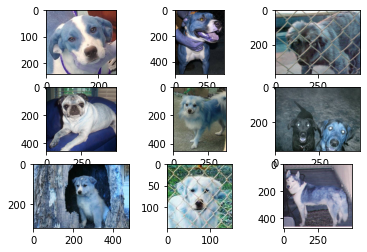

In [30]:
import os
import cv2
import matplotlib.pyplot as plt
data = os.listdir('./dog-cat-full-dataset-master/data/train')
c1 = 0
for i in data:
  c2=0
  folder = os.listdir('./dog-cat-full-dataset-master/data/train/'+i)
  for j in folder:
    if c2==9:
      break
    else:
      c2=c2+1
      path = str('./dog-cat-full-dataset-master/data/train/'+i)+'/'+j
      img = cv2.imread(path)
      plt.subplot(3,3,c2)
      plt.imshow(img)

# **Any Dataset From Kaggle**

In [31]:
!pip install -q kaggle

In [32]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rahula2003","key":"1a37836f41e612a45c00729b3c952a3a"}'}

In [33]:
!ls -lha kaggle.json

-rw------- 1 root root 66 Dec 21 20:38 kaggle.json


In [34]:
!mkdir -p ~/.kaggle

In [35]:
!cp kaggle.json ~/.kaggle/

In [36]:
!chmod 600 /root/.kaggle/kaggle.json

In [37]:
!kaggle datasets download -d ihelon/lego-minifigures-classification

lego-minifigures-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
zip_ref = zipfile.ZipFile('lego-minifigures-classification.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall(path='./lego-minifigures-classification/') #Extracts the files
zip_ref.close()

In [39]:
pwd

'/content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 01 - 08 12 22/Class work'

In [40]:
ls

'~'/                            lego-minifigures-classification/
 20BRS1102_Lab_01.ipynb         lego-minifigures-classification.zip
 cats-and-dogs.zip              LICENSE
 Dataset/                       logo-minifigures-classification/
 dog-cat-full-dataset-master/   marvel/
 harry-potter/                  metadata.csv
 index.csv                      multiclassimagedatasetairplanecar.zip
 jurassic-world/                star-wars/
'kaggle (1).json'               test/
 kaggle.json                    test.csv


<ipython-input-41-5c6c3bf5e810>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,c2)


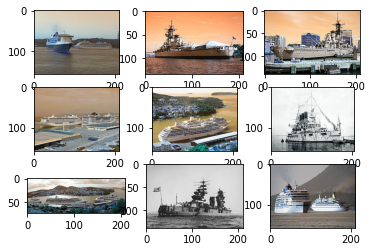

In [41]:
import os
import cv2
import matplotlib.pyplot as plt
data = os.listdir('./Dataset/train/')
c1 = 0
for i in data:
  c2=0
  folder = os.listdir('./Dataset/train/'+i)
  for j in folder:
    if c2==9:
      break
    else:
      c2=c2+1
      path = str('./Dataset/train/'+i)+'/'+j
      img = cv2.imread(path)
      plt.subplot(3,3,c2)
      plt.imshow(img)

# **PatchCamelyon Dataset**

As PatchCamelyon is very large dataset (approx. 8 GB), I am using a smaller dataset instead.

In [42]:
from tensorflow import keras
import tensorflow as tf
import os, datetime
import tensorflow_datasets as tfds

In [43]:
df, info = tfds.load('caltech101', with_info = True, as_supervised = True)

In [44]:
train_data = df['train']
test_data = df['test']

In [45]:
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image = image/255
  return image, labels

In [46]:
train_data = train_data.map(preprocess)
test_data = test_data.map(preprocess)

In [47]:
buffer_size = 100
train_data = train_data.shuffle(buffer_size)

In [48]:
batch_size = 1000
train_data = train_data.batch(batch_size).prefetch(1)
test_data = test_data.batch(batch_size).prefetch(1)